In [13]:
# fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [1]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128))
model.add(tf.keras.layers.ReLU())
model.add(keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
# optimizer and loss
opt = tf.keras.optimizers.SGD(0.001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
batch_size = 256
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=2, verbose=2)

Epoch 1/2
235/235 - 1s - loss: 13.1000 - sparse_categorical_accuracy: 0.4712 - val_loss: 1.6003 - val_sparse_categorical_accuracy: 0.5271 - 827ms/epoch - 4ms/step
Epoch 2/2
235/235 - 1s - loss: 1.4706 - sparse_categorical_accuracy: 0.5467 - val_loss: 1.4514 - val_sparse_categorical_accuracy: 0.5595 - 603ms/epoch - 3ms/step


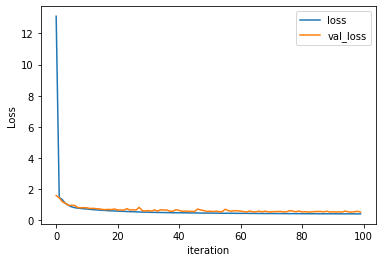

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

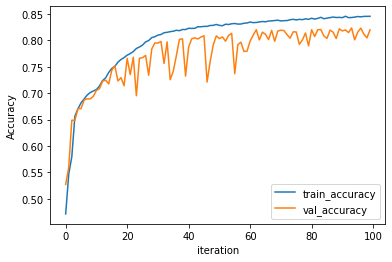

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
model.evaluate(X_test, y_test, batch_size)

40/40 [==============================] - 0s 2ms/step - loss: 0.5411 - sparse_categorical_accuracy: 0.8202


[0.5410730242729187, 0.8202000260353088]